# Job Hackthon Comeption

## Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Step:2 Loading train Data

In [2]:
train_data = pd.read_csv("Data/train.csv")
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


## Step:3 Data Pre-processing

In [3]:
#null values checking
train_data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

### Observations: There is no null values in any columns

In [4]:
# checking 5 point summary
train_data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [5]:
# checking datatype of each feature
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


### we will analyse now each columns one by one

In [6]:
# let see gender column distribution for each category
train_data["gender"].value_counts()

Male      50497
Female    38895
Name: gender, dtype: int64

[Text(0.5, 1.0, 'Gender count for each category')]

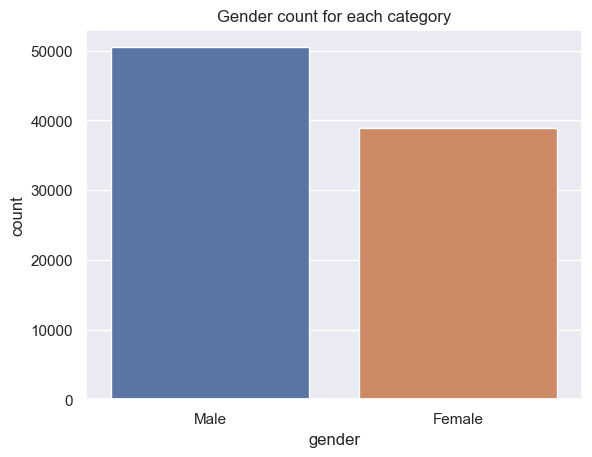

In [7]:
sns.countplot(x='gender', data=train_data).set(title="Gender count for each category")

In [8]:
# let see area column distribution for each category
train_data["area"].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

[Text(0.5, 1.0, 'area count for each category')]

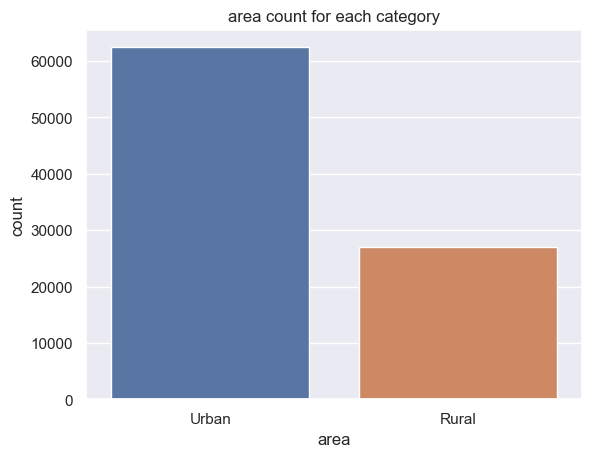

In [9]:
sns.countplot(x='area', data=train_data).set(title="area count for each category")

In [10]:
# checking qualification distribution for each category
train_data["qualification"].value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

[Text(0.5, 1.0, 'qualification count for each category')]

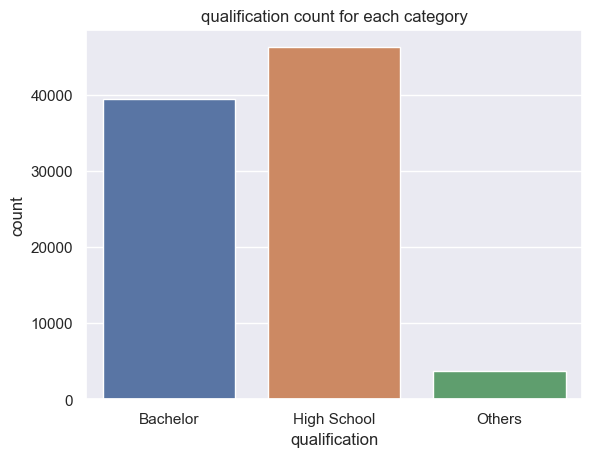

In [11]:
sns.countplot(x='qualification', data=train_data).set(title="qualification count for each category")

In [12]:
# checking income distribution
train_data["income"].value_counts()

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

[Text(0.5, 1.0, 'income count for each category')]

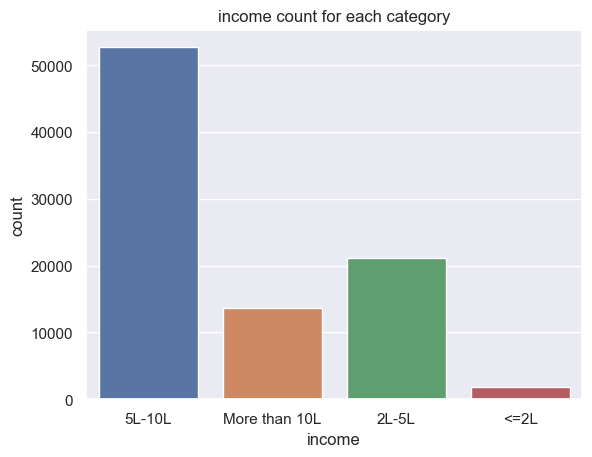

In [13]:
sns.countplot(x='income', data=train_data).set(title="income count for each category")

In [14]:
# checking marital_status distribution
train_data["marital_status"].value_counts()

1    51444
0    37948
Name: marital_status, dtype: int64

[Text(0.5, 1.0, 'Marital status count for each category')]

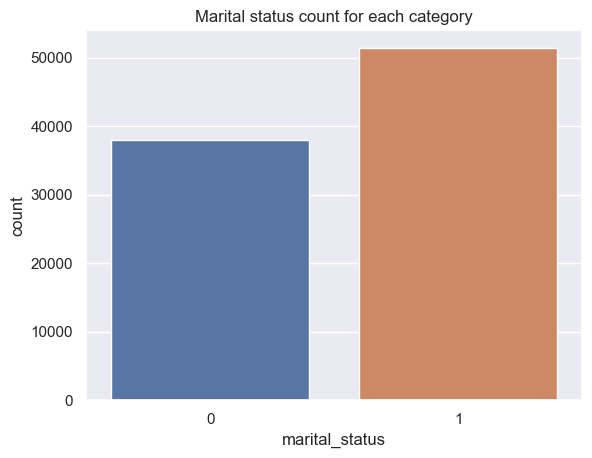

In [15]:
sns.countplot(x='marital_status', data=train_data).set(title="Marital status count for each category")

In [16]:
# checking vintage distribution
train_data["vintage"].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

[Text(0.5, 1.0, 'vintage count for each category')]

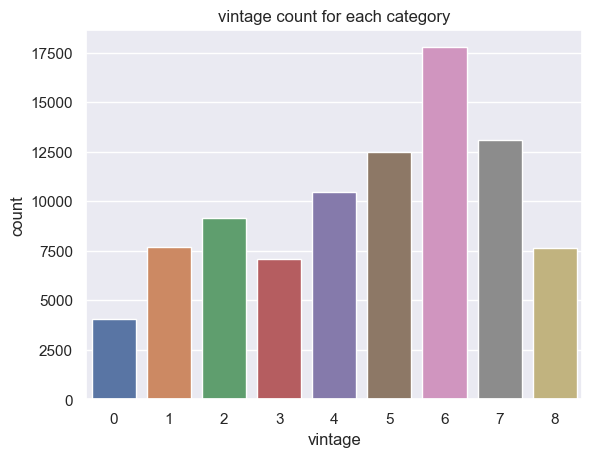

In [17]:
sns.countplot(x='vintage', data=train_data).set(title="vintage count for each category")

In [18]:
# checking num_policies distribution
train_data["num_policies"].value_counts()

More than 1    60263
1              29129
Name: num_policies, dtype: int64

[Text(0.5, 1.0, 'No of Policies count for each category')]

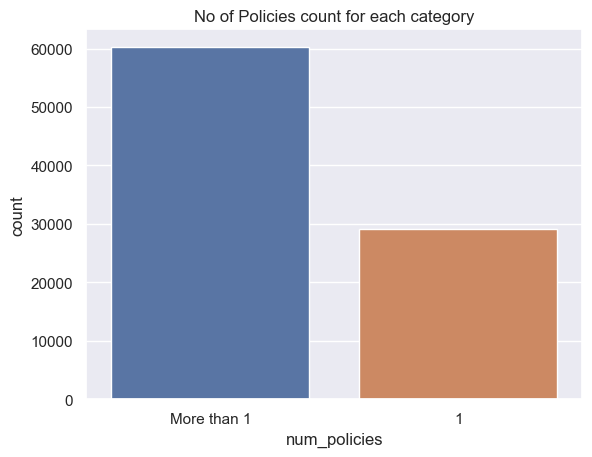

In [19]:
sns.countplot(x='num_policies', data=train_data).set(title="No of Policies count for each category")

In [20]:
# checking policy distribution
train_data["policy"].value_counts()

A    56644
B    24635
C     8113
Name: policy, dtype: int64

[Text(0.5, 1.0, 'policy count for each category')]

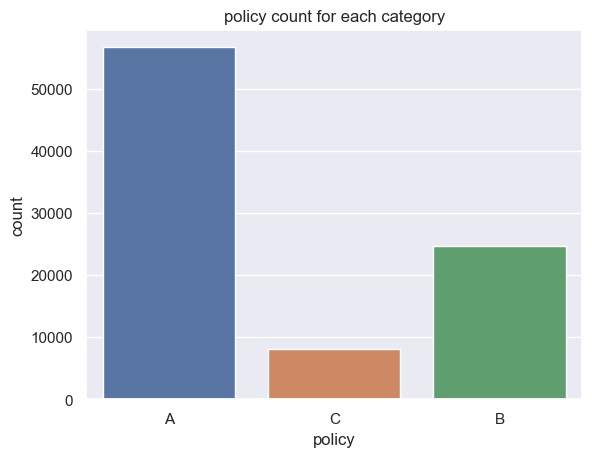

In [21]:
sns.countplot(x='policy', data=train_data).set(title="policy count for each category")

In [22]:
#checking type_of_policy distribution
train_data["type_of_policy"].value_counts()

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

[Text(0.5, 1.0, 'Type of Policies count for each category')]

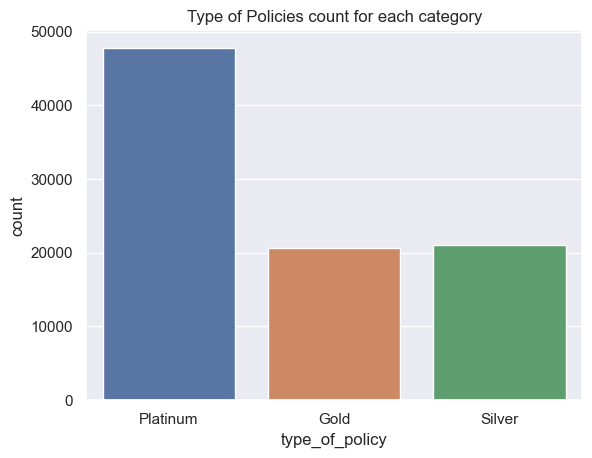

In [23]:
sns.countplot(x='type_of_policy', data=train_data).set(title="Type of Policies count for each category")

<AxesSubplot:xlabel='claim_amount'>

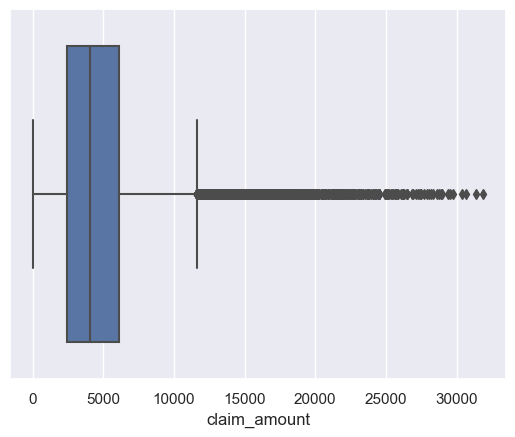

In [24]:
# Checking outliers for claim amount
sns.boxplot(x=train_data["claim_amount"])

In [25]:
cat_cols = ["gender","area","qualification","income","num_policies","policy","type_of_policy"]
## ENcoding
train_data_ready = pd.get_dummies(data=train_data, columns = cat_cols)

In [26]:
train_data_ready.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [27]:
# droping id columns
train_data_ready = train_data_ready.drop("id",axis =1)
train_data_ready.head()

,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,5,5790,64308,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,8,5080,515400,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,1,8,2599,64212,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
3,0,7,0,97920,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,1,6,3508,59736,0,1,0,1,0,1,...,0,1,0,1,1,0,0,1,0,0


<AxesSubplot:>

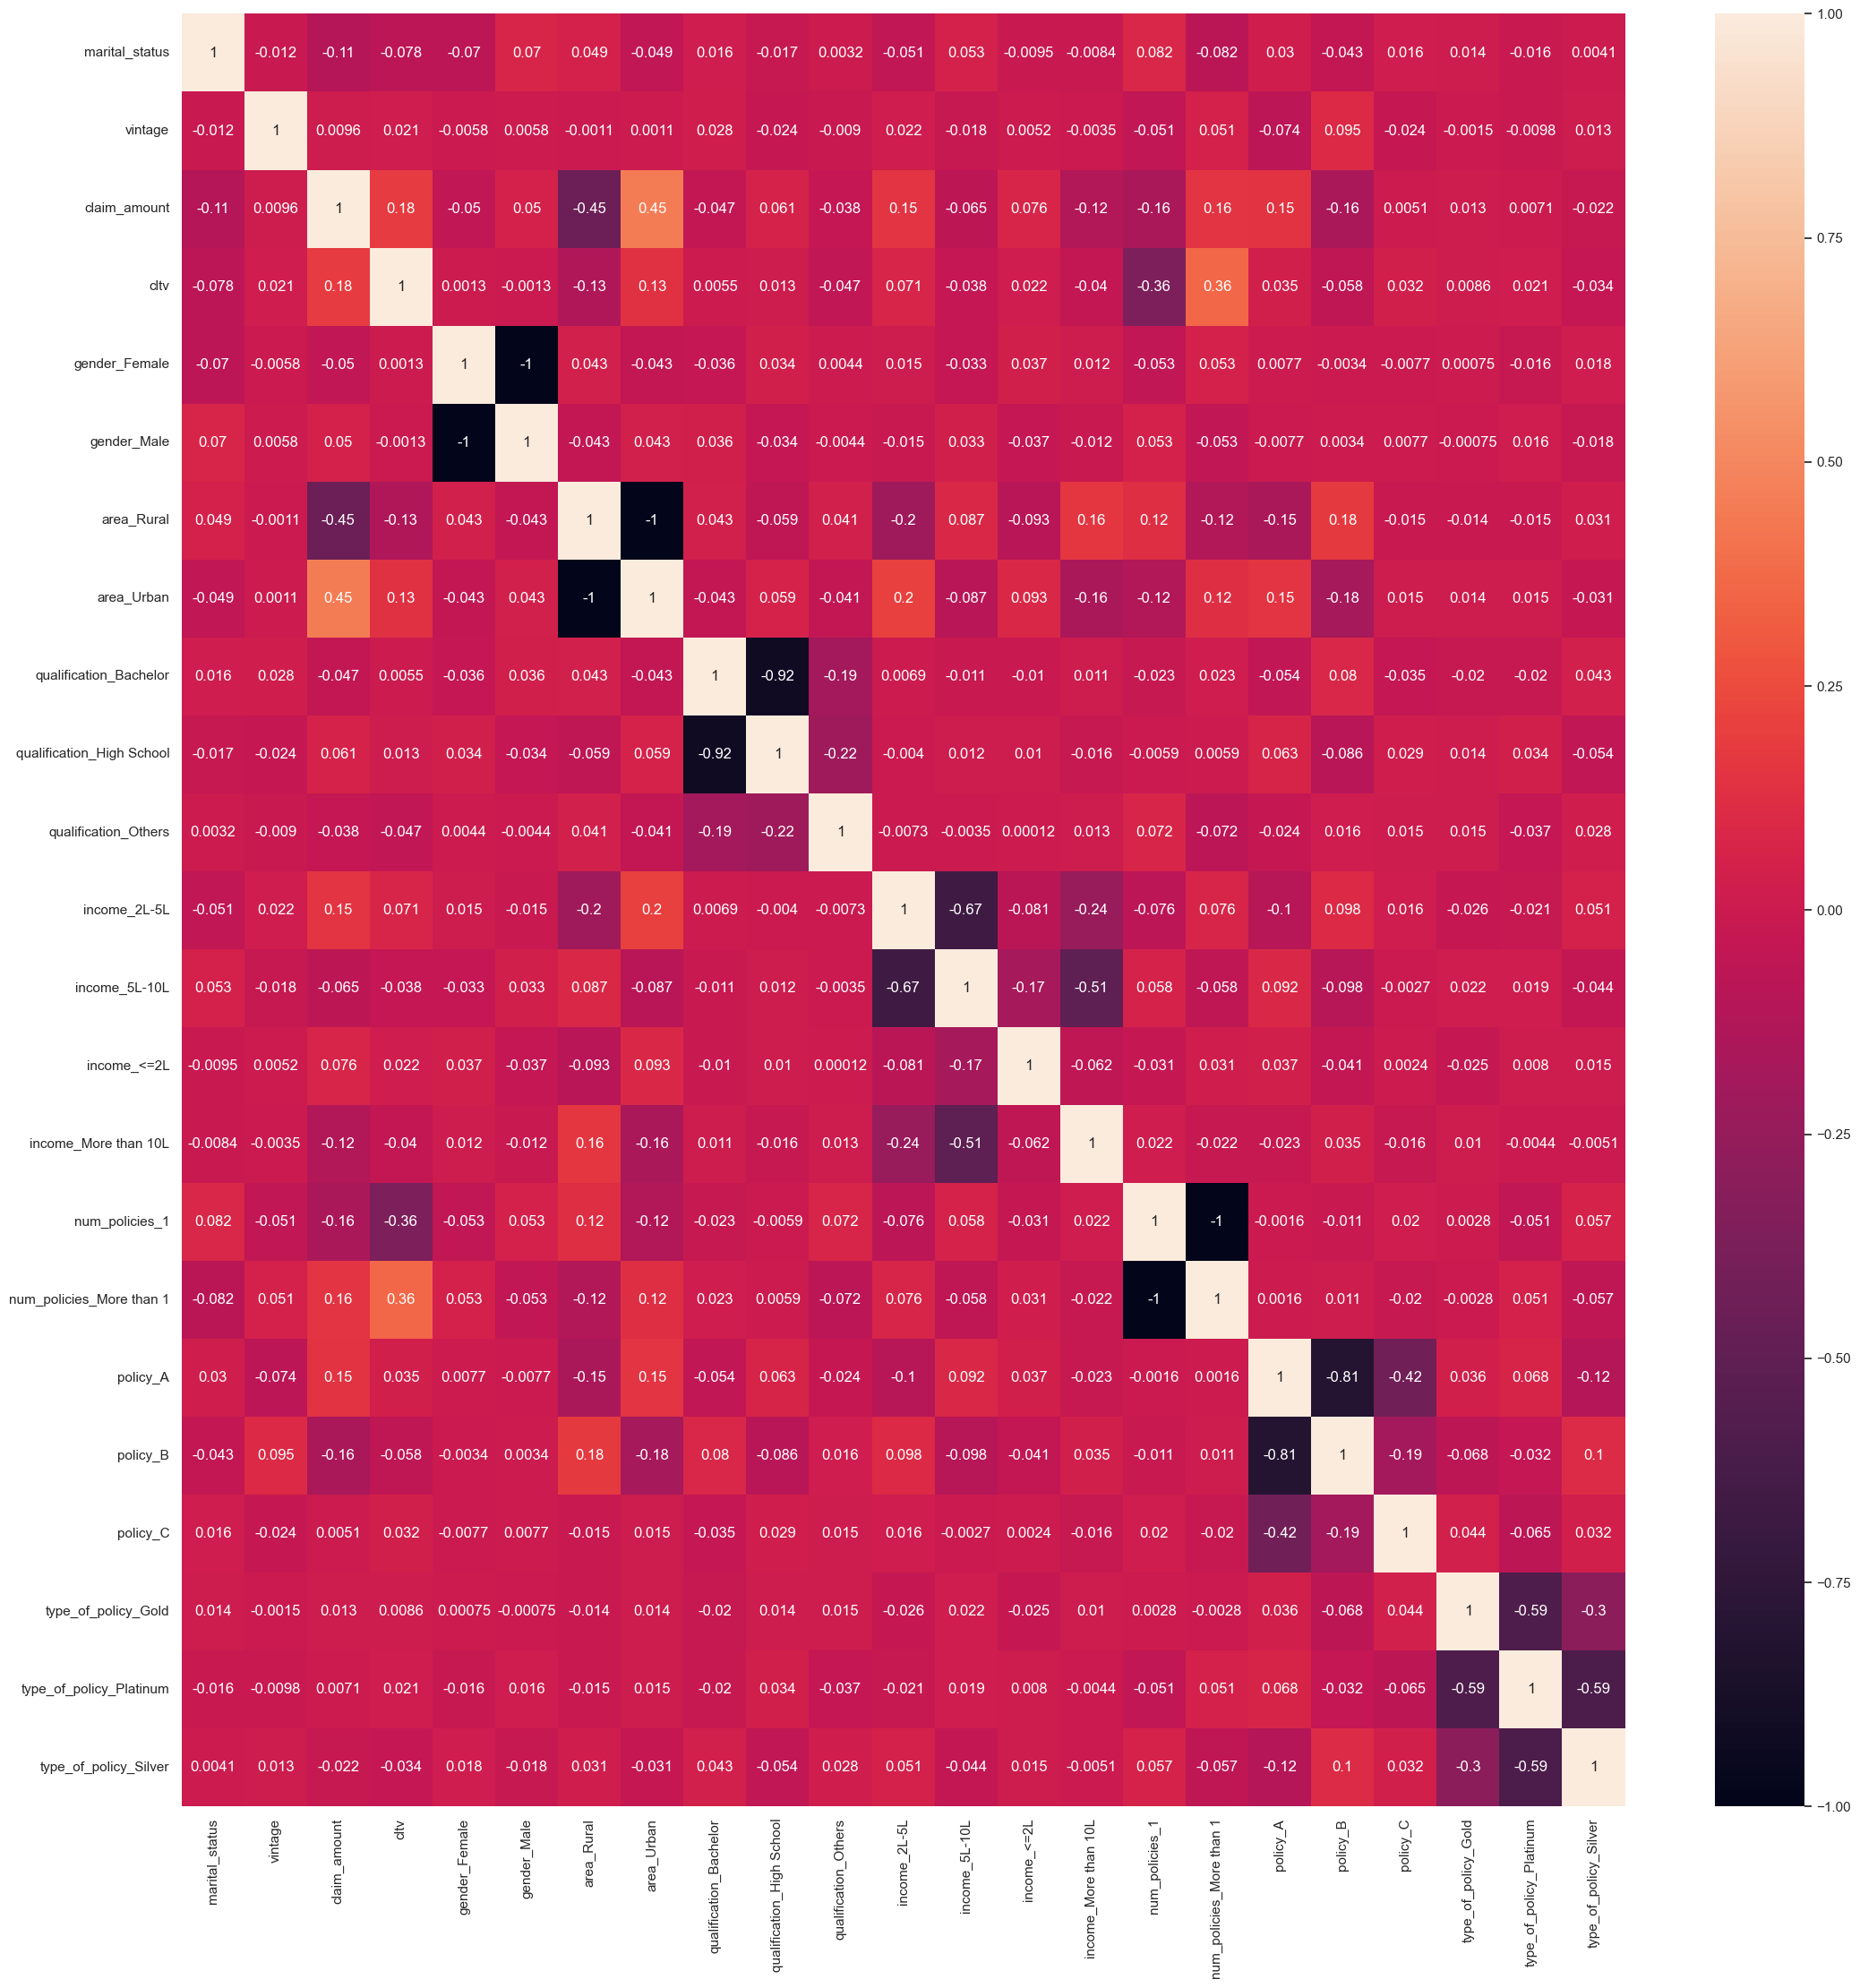

In [28]:
# correlation plot
plt.figure(figsize=(26, 26))
sns.heatmap(train_data_ready.corr(),annot = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

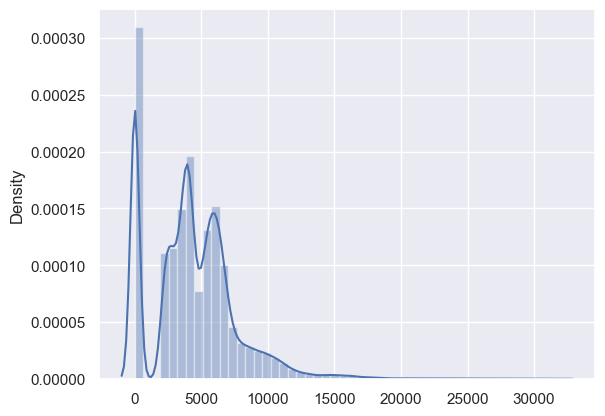

In [29]:
sns.distplot(x=train_data_ready["claim_amount"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

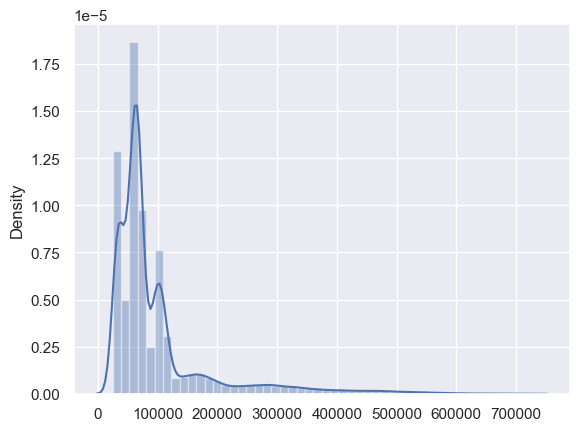

In [30]:
sns.distplot(x=train_data_ready["cltv"])

In [31]:
# creating target variable and feature
x = train_data_ready.drop(["cltv"],axis = 1)
y = train_data_ready["cltv"]

In [32]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x.columns.values]

In [33]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [34]:
regressor.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
y_pred = regressor.predict(x)

In [36]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.17802083757649767

### Importing Test data

In [37]:
# Testing Data
test_data = pd.read_csv("Data/test.csv")
test_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [38]:
test_data_processed = test_data.drop("id",axis = 1)

In [39]:
cat_cols = ["gender","area","qualification","income","num_policies","policy","type_of_policy"]
## ENcoding
test_data_processed = pd.get_dummies(data=test_data_processed, columns = cat_cols)

In [40]:
test_data_processed.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test_data_processed.columns.values]

In [41]:
y_test_pred = regressor.predict(test_data_processed)

In [42]:
y_test_pred

array([ 91931.305, 131190.58 ,  94208.8  , ..., 104906.484, 109889.41 ,
       113789.336], dtype=float32)

In [44]:
submission_data = pd.read_csv("Data/sample_submission_v1.csv")
#creating the sample submission file
submission_data["cltv"] = y_test_pred
submission_data.to_csv("sample_submission_v5.csv",index=False)

### Hyper parameter tunning

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# define the model
model = XGBRegressor()

# define the parameter grid
param_grid = {'learning_rate': [0.1, 0.01],
              'n_estimators': [100, 200],
              'max_depth': [3, 5],
              'subsample': [0.5, 1],
              'colsample_bytree': [0.5, 1]}

In [46]:
# create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

In [49]:
# fit the grid search object to the data
grid_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [50]:
# print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best score: 0.1606978826581255


In [51]:
regressor = xgb.XGBRegressor(
   colsample_bytree = 0.5, 
   learning_rate = 0.1, 
    max_depth = 3, 
    n_estimators = 100, 
    subsample =1
)

In [52]:
regressor.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [53]:
y_pred = regressor.predict(x)

In [54]:
r2_score(y,y_pred)

0.16489326086901346

In [55]:
y_test_pred = regressor.predict(test_data_processed)

In [56]:
submission_data = pd.read_csv("Data/sample_submission_v1.csv")
#creating the sample submission file
submission_data["cltv"] = y_test_pred
submission_data.to_csv("sample_submission_v13.csv",index=False)